<a href="https://colab.research.google.com/github/saraisab/machineLearning/blob/main/ml_seccion15_16_17_18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Máquinas de vectores de soporte vectorial SVM Clasificación y regresión

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

flores = sns.load_dataset('iris')
flores.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
flores['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

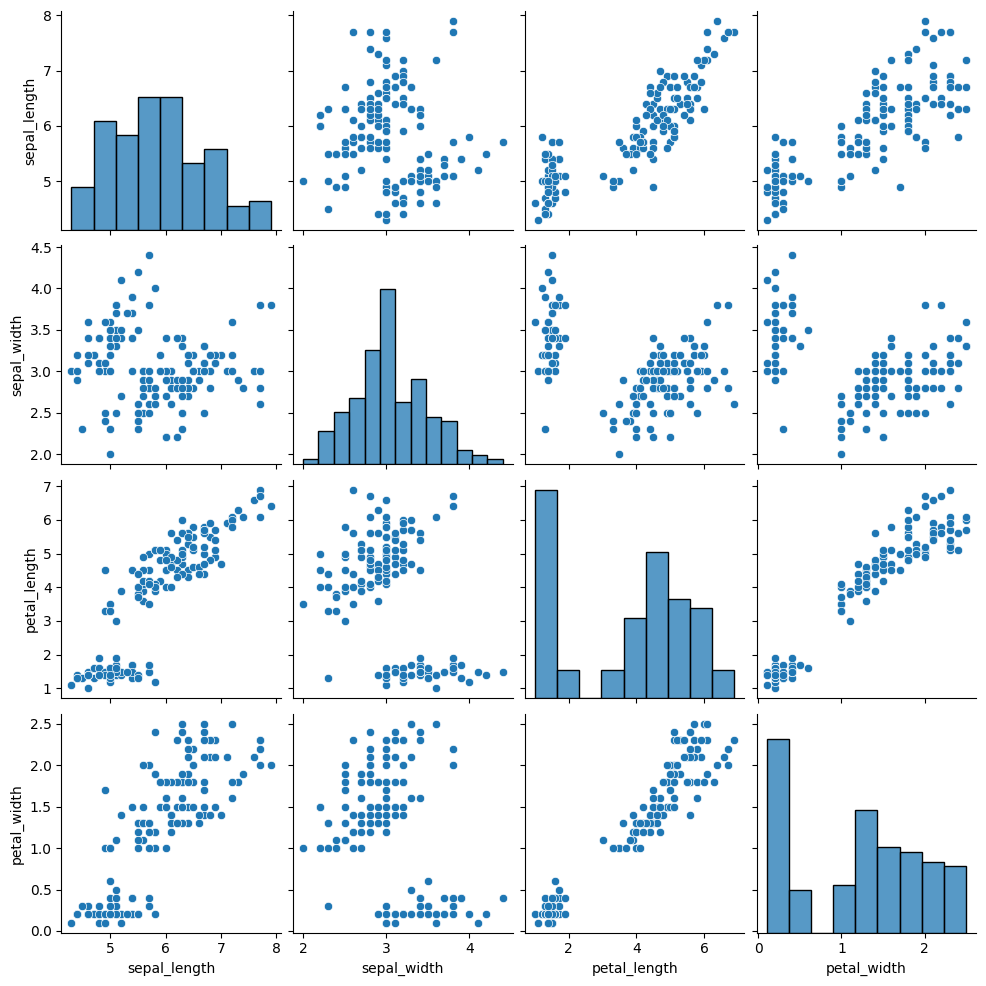

In [3]:
sns.pairplot(flores)

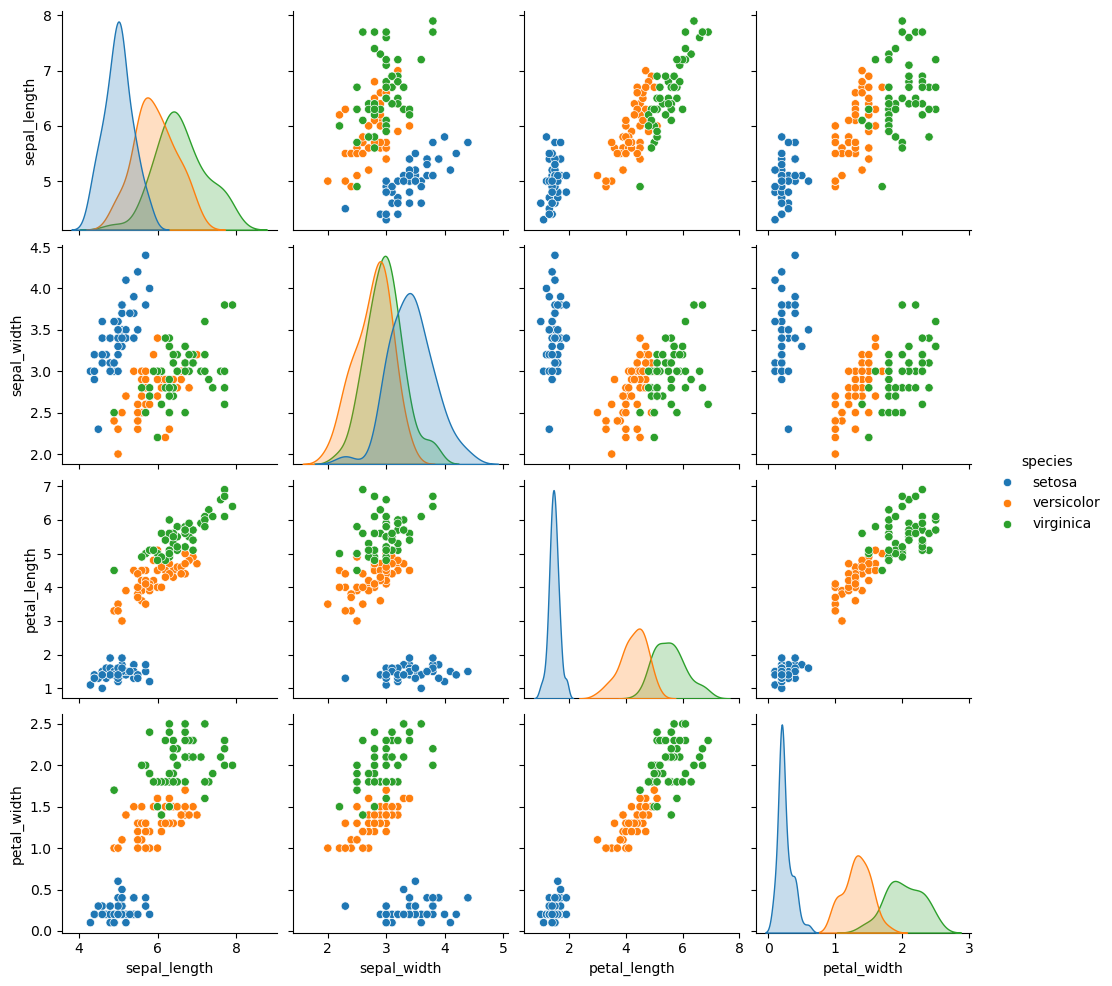

In [ ]:
#lo podemos dividir por especies
sns.pairplot(flores, hue='species')

In [13]:
# definimos las especies por un lado y por otro lado el conjuto de dataset sin species
from sklearn.model_selection import train_test_split

X = flores.drop('species', axis=1)
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
y = flores['species']
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train

,sepal_length,sepal_width,petal_length,petal_width
38,4.4,3.0,1.3,0.2
121,5.6,2.8,4.9,2.0
52,6.9,3.1,4.9,1.5
83,6.0,2.7,5.1,1.6
114,5.8,2.8,5.1,2.4
...,...,...,...,...
17,5.1,3.5,1.4,0.3
12,4.8,3.0,1.4,0.1
40,5.0,3.5,1.3,0.3
102,7.1,3.0,5.9,2.1


In [ ]:
from sklearn.svm import SVC

#creamos el modelo
modelo = SVC(gamma='auto')
# lo entrenamos
modelo.fit(X_train, y_train)

#creamos las predicciones
predicciones = modelo.predict(X_test)

predicciones

array(['setosa', 'versicolor', 'virginica', 'setosa', 'versicolor',
       'virginica', 'setosa', 'virginica', 'virginica', 'setosa',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'virginica', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'virginica', 'versicolor', 'versicolor', 'setosa'],
      dtype=object)

In [ ]:
y_test

5          setosa
69     versicolor
111     virginica
24         setosa
86     versicolor
142     virginica
17         setosa
149     virginica
119     virginica
43         setosa
6          setosa
78     versicolor
138     virginica
45         setosa
67     versicolor
101     virginica
91     versicolor
83     versicolor
42         setosa
0          setosa
143     virginica
88     versicolor
74     versicolor
92     versicolor
8          setosa
62     versicolor
10         setosa
116     virginica
123     virginica
146     virginica
147     virginica
140     virginica
31         setosa
124     virginica
38         setosa
99     versicolor
29         setosa
1          setosa
136     virginica
145     virginica
40         setosa
122     virginica
70     versicolor
76     versicolor
20         setosa
Name: species, dtype: object

In [ ]:
#evaluamos el modelo
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicciones))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       0.92      0.92      0.92        13
   virginica       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
print(confusion_matrix(y_test, predicciones))

[[16  0  0]
 [ 0 12  1]
 [ 0  1 15]]


## Algoritmo de k-medias

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# blobs es puntos, feautres x e y, centers son los centros (del 0 al 3)
datos = make_blobs(n_samples=200, n_features=2, centers=4)
datos


(array([[ -1.14620224,  -9.42280395],
        [  8.21337791,  -1.65872888],
        [  4.70629433,   9.02481798],
        [ -7.79189292,   5.23044117],
        [  7.34492364,  -1.35896507],
        [ -1.71340006, -10.1330199 ],
        [ -7.77344247,   4.12983324],
        [  8.37528135,  -3.25561435],
        [ -5.64619727,   5.82656209],
        [ -7.0551746 ,   6.54919832],
        [  0.42508974,  -7.51118569],
        [  5.89960717,   8.69892391],
        [  3.78785529,   7.725358  ],
        [  8.13939001,  -0.92755551],
        [ -1.66443479,  -8.04222085],
        [  3.00891636,   9.22794903],
        [ -8.31880095,   5.66240562],
        [  4.08367663,   8.59450443],
        [ -6.013642  ,   7.64196534],
        [  4.51007798,   9.73326155],
        [  3.84982326,   9.28549921],
        [  7.49327797,  -3.33675229],
        [  7.91555023,  -2.95613109],
        [ -1.14646671, -10.17607786],
        [ -7.87308932,   7.38304861],
        [ -2.3218739 , -11.23509741],
        [ -1

In [ ]:
datos[0]

array([[ -3.00472395,  -1.93921102],
       [  1.32723348,  -7.60935476],
       [  5.81079957,  -6.99508651],
       [ -3.3506652 ,  -5.36829667],
       [ -4.63522435,  -3.66446455],
       [  3.72733402,  -8.65596687],
       [ -0.95359489,  -6.5852639 ],
       [ -3.46087986,  -3.66077643],
       [ -3.63498725,  -2.21805813],
       [  5.2528669 ,  -7.42023162],
       [ -2.49105782,  -1.9237178 ],
       [  4.74490271,  -6.39146064],
       [ -1.88242088,  -0.93271342],
       [ -2.02401895,  -0.39833299],
       [ -1.39167937,  -5.05388659],
       [ -2.35700672,  -1.34669044],
       [ -1.77862476,  -3.465222  ],
       [  1.6932565 ,  -6.23954909],
       [  3.31778361,  -8.40763635],
       [  3.19509299,  -8.28492235],
       [  2.41233112,  -7.37071097],
       [ -4.11055609,  -4.78659814],
       [ -3.29134428,  -2.0813194 ],
       [  1.37616906,  -9.48784956],
       [ -3.35901082,  -2.34574668],
       [ -3.84591164,  -1.51550606],
       [  2.76471148,  -6.81875961],
 

In [ ]:
# el grupo al q pertenece cada uno de los puntos
datos[1]

array([0, 2, 3, 1, 1, 2, 1, 1, 0, 3, 0, 3, 0, 0, 1, 0, 1, 2, 3, 3, 3, 1,
       0, 2, 0, 0, 2, 1, 1, 0, 3, 0, 0, 0, 2, 1, 0, 2, 2, 0, 2, 2, 1, 1,
       2, 0, 1, 3, 2, 0, 3, 1, 0, 1, 3, 3, 3, 3, 3, 0, 0, 3, 2, 1, 1, 3,
       2, 1, 0, 2, 0, 0, 0, 3, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 3, 2, 1, 2,
       1, 3, 2, 2, 2, 1, 0, 3, 1, 2, 1, 0, 1, 3, 0, 0, 3, 1, 3, 3, 2, 3,
       0, 3, 1, 3, 3, 3, 2, 3, 2, 2, 0, 2, 1, 1, 1, 2, 0, 1, 3, 1, 3, 3,
       2, 3, 0, 2, 1, 3, 1, 2, 0, 1, 3, 3, 0, 2, 2, 3, 1, 2, 0, 0, 1, 0,
       3, 0, 1, 3, 0, 1, 3, 3, 2, 0, 1, 1, 1, 0, 3, 2, 3, 2, 1, 0, 0, 1,
       0, 0, 2, 2, 2, 1, 3, 2, 1, 2, 3, 3, 1, 2, 3, 2, 3, 1, 3, 0, 0, 0,
       2, 2])

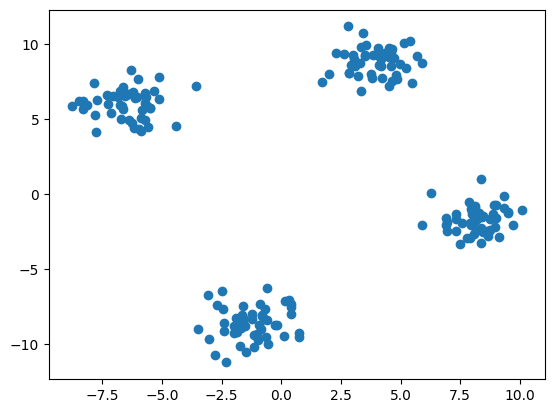

In [9]:
plt.scatter(datos[0][:,0], datos[0][:,1])

In [5]:
# generar el modelo
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=4)
modelo.fit(datos[0])

KMeans(n_clusters=4)

In [6]:
modelo.cluster_centers_

array([[ 3.96381313,  8.82309142],
       [ 8.21297042, -1.72486232],
       [-1.2315759 , -8.62136821],
       [-6.46153321,  6.01159555]])

In [7]:
modelo.labels_

array([2, 1, 0, 3, 1, 2, 3, 1, 3, 3, 2, 0, 0, 1, 2, 0, 3, 0, 3, 0, 0, 1,
       1, 2, 3, 2, 2, 0, 1, 0, 2, 3, 3, 1, 0, 3, 0, 0, 0, 3, 0, 1, 2, 3,
       0, 1, 1, 3, 2, 1, 3, 0, 2, 0, 3, 0, 1, 1, 0, 2, 2, 1, 3, 2, 1, 2,
       1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 0, 1, 3, 0, 3, 2, 1, 3, 1, 3, 3,
       0, 0, 2, 3, 1, 3, 1, 2, 2, 2, 2, 3, 2, 1, 0, 2, 1, 1, 1, 2, 0, 0,
       1, 1, 1, 0, 3, 3, 3, 0, 3, 3, 2, 1, 2, 0, 1, 2, 2, 2, 1, 0, 1, 1,
       3, 1, 3, 3, 0, 0, 1, 3, 2, 1, 0, 0, 1, 3, 3, 3, 3, 3, 1, 3, 2, 0,
       2, 3, 2, 1, 2, 2, 3, 2, 0, 0, 0, 1, 2, 1, 1, 3, 2, 2, 2, 2, 0, 2,
       0, 2, 0, 0, 3, 0, 1, 1, 2, 3, 3, 1, 0, 1, 3, 2, 3, 3, 1, 3, 3, 2,
       0, 0], dtype=int32)

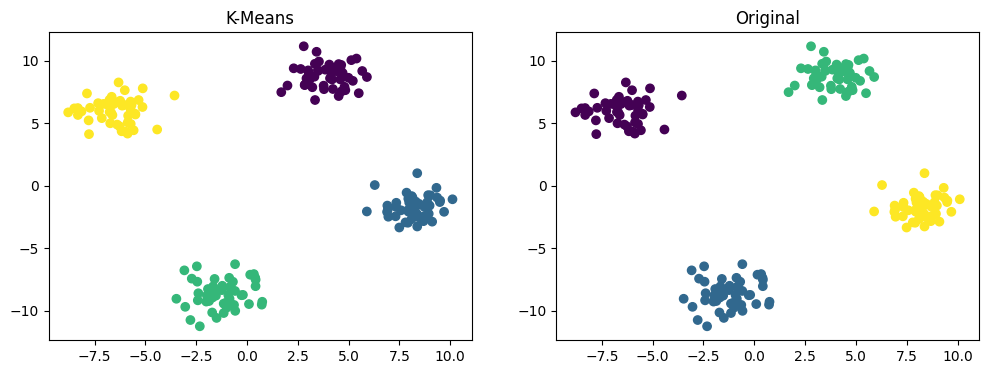

In [10]:
# para ver si los ha agrupado de la misma forma
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
ax1.set_title('K-Means')
ax1.scatter(datos[0][:,0], datos[0][:,1], c=modelo.labels_)
ax2.set_title('Original')
ax2.scatter(datos[0][:,0], datos[0][:,1], c=datos[1])

## Exportar modelo a un fichero

Una vez que hemos entrenado nuestro modelo, podemos guardarlo en un fichero binario (mediante la librería pickle) para poder llevarlo a otro entorno o programa.

Pasos:

1.- Importamos la librería pickle

import pickle

2.- Creamos un fichero binario (modelo_entrenado.pickle) con el modelo entrenado

    with open("modelo_entrenado.pickle", "wb") as file:
        pickle.dump(modelo_entrenado, file)

## Importar modelo desde un fichero

Si queremos importar un modelo de machine learning ya entrenado que está grabado en un fichero binario, seguiremos estos pasos:

1.- Importamos la librería pickle

import pickle

2.- Importamos el modelo desde el fichero binario "modelo_entrenado.pickle"

    with open('modelo_entrenado.pickle', "rb") as file:
        modelo_entrenado = pickle.load(file)

In [18]:
# vamos a guardar un modelo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

flores = sns.load_dataset('iris')

# definimos las especies por un lado y por otro lado el conjuto de dataset sin species
X = flores.drop('species', axis=1)
y = flores['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


#creamos el modelo
modelo_flores = SVC(gamma='auto')
# lo entrenamos
modelo_flores.fit(X_train, y_train)

#creamos las predicciones
predicciones = modelo_flores.predict(X_test)
#evaluamos el modelo
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicciones))


print(confusion_matrix(y_test, predicciones))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[12  0  0]
 [ 0 14  0]
 [ 0  2 17]]


In [19]:
import pickle

#guardamos el modelo
with open('modelo.pickle', 'wb') as file:
    pickle.dump(modelo_flores, file)

In [20]:
#cargamos el modelo
with open('modelo.pickle', 'rb') as file:
    modelo_cargado = pickle.load(file)

In [22]:
# hacemos la prediccion del modelo
predicciones = modelo_cargado.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, predicciones))
print(confusion_matrix(y_test, predicciones))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        12
  versicolor       0.88      1.00      0.93        14
   virginica       1.00      0.89      0.94        19

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45

[[12  0  0]
 [ 0 14  0]
 [ 0  2 17]]
